<img src="support_files/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Python Bootcamp</h1> 
<h3 align="center">August 20-21, 2016, Seattle, WA</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<center><h1>Introduction to Pandas</h1></center>

<p>
**`pandas`** is a library with high-level data structures and manipulation tools:
<p><ul> 
<li>Data loading/saving
<li>Data exploration
<li>Filtering, selecting
<li>Plotting/visualization
<li>Computing summary statistics
<li>Groupby operations
</ul>

<p>
**DataFrame Object**
<ul>
<li>Represents a tabular, spreadsheet-like data structure
<li>Ordered collection of columns
<li>Each column can be a different value type (numeric, string, boolean, etc.)
</ul>
<p>This introduction will only just scratch the surface of Pandas functionality. For more information, check out the full documentation here: 
<p>&nbsp;&nbsp;&nbsp;&nbsp;http://pandas.pydata.org/pandas-docs/stable/index.html
<p>Or check out the '10 minutes to Pandas' tutorial here: 
<p>&nbsp;&nbsp;&nbsp;&nbsp;http://pandas.pydata.org/pandas-docs/stable/10min.html
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Let's roll</h2>
<p>
</div>

In [67]:
from IPython.display import HTML
HTML("""<iframe src="https://giphy.com/embed/QoCoLo2opwUW4" width="480" height="278" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/panda-playing-QoCoLo2opwUW4">via GIPHY</a></p>""")

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Imports</h2>
<p>
</div>

In [1]:
# Convention for import naming
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function

%matplotlib inline

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Loading data</h2>
<p>Pandas has a lot of convenient built-in methods for reading data of various formats.
<p>Make and print a list of all of the Pandas methods with the word 'read' in them:
</div>

In [4]:
read_methods = [x for x in dir(pd) if 'read' in x]
for method in read_methods:
    print(method)

read_clipboard
read_csv
read_excel
read_feather
read_fwf
read_gbq
read_hdf
read_html
read_json
read_msgpack
read_pickle
read_sas
read_sql
read_sql_query
read_sql_table
read_stata
read_table



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Load tabular data from CSV file</h2>

<p>A simple csv file is saved in the working directory on your hard drive. We'll take a minute to open the file and view it.
<p>Pandas can quickly load and display it. Note that it automatically parses the column names
</div>

In [5]:
df = pd.read_csv('support_files/pokemon_alopez247.csv')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2>Use ```head()``` and ```tail()``` methods to take quick look at data structure</h2>
<p>The ```head()``` method displays the first N rows, with N=5 by default

<p>The ```tail()``` method displays the last N rows, with N=5 by default
</div>

In [6]:
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [7]:
df.tail(2)

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
719,720,Hoopa,Psychic,Ghost,600,80,110,60,150,130,...,Purple,False,NaN,Undiscovered,NaN,False,0.51,9.0,3,head_only
720,721,Volcanion,Fire,Water,600,80,110,120,130,90,...,Brown,False,NaN,Undiscovered,NaN,False,1.70,195.0,3,quadruped


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Many familiar functions/methods work with DataFrames</h2>
<p>
</div>

In [8]:
# numpy function
np.shape(df)

(721, 23)

In [9]:
# python built-in function
len(df)

721

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>This is because a DataFrame is "simply" a numpy array with columns and rows labelled</h2>
<p>
</div>

In [10]:
# we can grab the underlying numpy array alone
df.values

array([[1L, 'Bulbasaur', 'Grass', ..., 6.9, 45L, 'quadruped'],
       [2L, 'Ivysaur', 'Grass', ..., 13.0, 45L, 'quadruped'],
       [3L, 'Venusaur', 'Grass', ..., 100.0, 45L, 'quadruped'],
       ..., 
       [719L, 'Diancie', 'Rock', ..., 8.8, 3L, 'head_arms'],
       [720L, 'Hoopa', 'Psychic', ..., 9.0, 3L, 'head_only'],
       [721L, 'Volcanion', 'Fire', ..., 195.0, 3L, 'quadruped']], dtype=object)

In [11]:
# we can also get the columns
df.columns

Index([u'Number', u'Name', u'Type_1', u'Type_2', u'Total', u'HP', u'Attack',
       u'Defense', u'Sp_Atk', u'Sp_Def', u'Speed', u'Generation',
       u'isLegendary', u'Color', u'hasGender', u'Pr_Male', u'Egg_Group_1',
       u'Egg_Group_2', u'hasMegaEvolution', u'Height_m', u'Weight_kg',
       u'Catch_Rate', u'Body_Style'],
      dtype='object')

In [12]:
# and the rows
df.index

RangeIndex(start=0, stop=721, step=1)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 6.1:**
<p>Identify another familiar function that works with the DataFrame
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2>Selecting columns</h2>

<p>Retrieve column based on column name.
<p>There are two notations that allow you to access data from a column:
<ul>
<li>bracket notation
<li>dot notation
</ul>
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>Bracket notation:

</div>

In [13]:
attack = df['Attack']
attack.head()

0    49
1    62
2    82
3    52
4    64
Name: Attack, dtype: int64

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>Dot notation:
<p>note that this is sensitive to special characters in the variable name such as spaces, dashes, etc.

</div>

In [14]:
body_style = df.Body_Style
print(body_style.head())

0         quadruped
1         quadruped
2         quadruped
3    bipedal_tailed
4    bipedal_tailed
Name: Body_Style, dtype: object


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
The returned column is a Series object
</div>

In [15]:
print(type(body_style))

<class 'pandas.core.series.Series'>


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 6.3:**
<ol>
<li>What data type are entries in the column "Catch_Rate"?
<li>What data type are entries in the column "Height_m"?
</ol>
</div>

In [16]:
df['Catch_Rate'].dtype

dtype('int64')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>The Series object has a lot of useful built-in functions</h2>
<p>Start with ```unique```
</div>

In [17]:
df['Color'].unique()

array(['Green', 'Red', 'Blue', 'White', 'Brown', 'Yellow', 'Purple',
       'Pink', 'Grey', 'Black'], dtype=object)

In [18]:
print("Pokemon types in this dataset:")
for line in df['Type_1'].unique():
    print("  ",line)

Pokemon types in this dataset:
   Grass
   Fire
   Water
   Bug
   Normal
   Poison
   Electric
   Ground
   Fairy
   Fighting
   Psychic
   Rock
   Ghost
   Ice
   Dragon
   Dark
   Steel
   Flying


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise 6.2:**
<ol>
<li> How many different Egg Groups exist in this dataset?
<li> How many different Body Types exist in this dataset?
</ol>
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2>Get values as numpy ndarray</h2>
<p>
</div>


In [19]:
weight = df['Weight_kg'].values
weight

array([  6.90000000e+00,   1.30000000e+01,   1.00000000e+02,
         8.50000000e+00,   1.90000000e+01,   9.05000000e+01,
         9.00000000e+00,   2.25000000e+01,   8.55000000e+01,
         2.90000000e+00,   9.90000000e+00,   3.20000000e+01,
         3.20000000e+00,   1.00000000e+01,   2.95000000e+01,
         1.80000000e+00,   3.00000000e+01,   3.95000000e+01,
         3.50000000e+00,   1.85000000e+01,   2.00000000e+00,
         3.80000000e+01,   6.90000000e+00,   6.50000000e+01,
         6.00000000e+00,   3.00000000e+01,   1.20000000e+01,
         2.95000000e+01,   7.00000000e+00,   2.00000000e+01,
         6.00000000e+01,   9.00000000e+00,   1.95000000e+01,
         6.20000000e+01,   7.50000000e+00,   4.00000000e+01,
         9.90000000e+00,   1.99000000e+01,   5.50000000e+00,
         1.20000000e+01,   7.50000000e+00,   5.50000000e+01,
         5.40000000e+00,   8.60000000e+00,   1.86000000e+01,
         5.40000000e+00,   2.95000000e+01,   3.00000000e+01,
         1.25000000e+01,

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>Print the type of ```weight```:
</div>

In [20]:
print(type(weight))

<type 'numpy.ndarray'>


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2>Plot the injection volume values using Matplotlib</h2>
<p>We can use Matplotlib to plot the array that we just extracted from the dataframe:
</div>

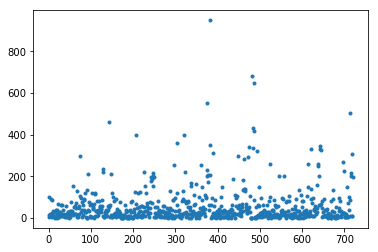

In [21]:
# Plot array to inspect array
fig,ax = plt.subplots(1,1)
ax.plot(weight,'.')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Plot the injection volume values using the Pandas built-in plotting method</h2>
<p>Pandas also has a built-in plotting function that will allow us to make the plot directly from the dataframe
<p>It does some nice formatting for you, but you still have access to matplotlib methods
</div>

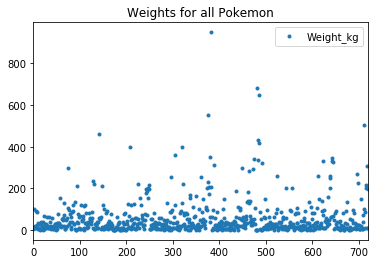

In [22]:
ax = df.plot(x=df.index,y='Weight_kg',marker='.',linestyle='none')

ax.set_title('Weights for all Pokemon')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise 6.4:**
<p>Retrieve a different column and make plot of data
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Select multiple columns</h2>
<p>We can make a new dataframe that contains only a subset of the column data from the first dataframe
</div>

In [23]:
# Use copy to get new DataFrame object instead of a 'view' on existing object
df2 = df[['Type_1','Type_2','Weight_kg']].copy()

In [24]:
df2.head(10)

,Type_1,Type_2,Weight_kg
0,Grass,Poison,6.9
1,Grass,Poison,13.0
2,Grass,Poison,100.0
3,Fire,NaN,8.5
4,Fire,NaN,19.0
5,Fire,Flying,90.5
6,Water,NaN,9.0
7,Water,NaN,22.5
8,Water,NaN,85.5
9,Bug,NaN,2.9


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Adding, deleting columns</h2>
<p>
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>Let's add a column denoting whether injection is in wild type or transgenic mouse.
<p>Note that wild type mice have a ```NaN``` in the 'transgenic-line' column
</div>

In [25]:
df2['Type_2'].head()

0    Poison
1    Poison
2    Poison
3       NaN
4       NaN
Name: Type_2, dtype: object

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>Step 1:
<p>We can use the ```isnull``` method to find all of the entries with ```NaN``` or ```None```
</div>

In [26]:
has_subtype = df2['Type_2'].isnull() #isnull() returns True if value is NaN or None. 
print(has_subtype.head())

0    False
1    False
2    False
3     True
4     True
Name: Type_2, dtype: bool


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>Step 2:
<p>We can create a new column and assign the 'is_wt' series that we just created to that column
</div>

In [27]:
df2['has_subtype'] = has_subtype

In [28]:
df2.head(5)

,Type_1,Type_2,Weight_kg,has_subtype
0,Grass,Poison,6.9,False
1,Grass,Poison,13.0,False
2,Grass,Poison,100.0,False
3,Fire,NaN,8.5,True
4,Fire,NaN,19.0,True


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Delete column (note: inplace argument)</h2>
<p>
</div>

In [29]:
df2.drop('Type_2',axis=1,inplace=True)
# note: this would the same as df2 = df2.drop('transgenic-line',axis=1)

In [30]:
df2.head(6)

,Type_1,Weight_kg,has_subtype
0,Grass,6.9,False
1,Grass,13.0,False
2,Grass,100.0,False
3,Fire,8.5,True
4,Fire,19.0,True
5,Fire,90.5,False


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Selecting rows and filtering</h2>
<p>
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
**Slice rows**
<p>We can use Numpy-like slicing to access particular rows
</div>

In [31]:
# this works...
df[150:190:10] # [start:end:step]

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
150,151,Mew,Psychic,NaN,600,100,100,100,100,100,...,Pink,False,NaN,Undiscovered,NaN,False,0.41,4.0,45,bipedal_tailed
160,161,Sentret,Normal,NaN,215,35,46,34,35,45,...,Brown,True,0.5,Field,NaN,False,0.79,6.0,255,quadruped
170,171,Lanturn,Water,Electric,460,125,58,58,76,76,...,Blue,True,0.5,Water_2,NaN,False,1.19,22.5,75,with_fins
180,181,Ampharos,Electric,NaN,510,90,75,85,115,90,...,Yellow,True,0.5,Monster,Field,True,1.40,61.5,45,bipedal_tailed


In [32]:
# but can be confusing since that's how we get columns. Better:
df.loc[150:190:10]

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
150,151,Mew,Psychic,NaN,600,100,100,100,100,100,...,Pink,False,NaN,Undiscovered,NaN,False,0.41,4.0,45,bipedal_tailed
160,161,Sentret,Normal,NaN,215,35,46,34,35,45,...,Brown,True,0.5,Field,NaN,False,0.79,6.0,255,quadruped
170,171,Lanturn,Water,Electric,460,125,58,58,76,76,...,Blue,True,0.5,Water_2,NaN,False,1.19,22.5,75,with_fins
180,181,Ampharos,Electric,NaN,510,90,75,85,115,90,...,Yellow,True,0.5,Monster,Field,True,1.40,61.5,45,bipedal_tailed
190,191,Sunkern,Grass,NaN,180,30,30,30,30,30,...,Yellow,True,0.5,Grass,NaN,False,0.30,1.8,235,head_only


In [33]:
# indices are maintained when you create a series object from a column
df['Name'][150:190:10]

150         Mew
160     Sentret
170     Lanturn
180    Ampharos
Name: Name, dtype: object

In [34]:
# the index can be any unique set of values. let's make the index the name of the pokemon

df.set_index('Name',inplace=True)

In [35]:
df.head()

,Number,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
Name,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [36]:
# Now this breaks because our indices are no longer integers
try:
    df.loc[150:190:10]
except Exception as e:
    print(e)

cannot do slice indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [150] of <type 'int'>


In [37]:
# instead, we can use .loc to grab rows just like we grab columns
df.loc[['Bulbasaur','Ivysaur','Charmander']]

,Number,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
Name,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
**Select rows based on boolean array (very commonly used)**
<p>This is very powerful as it lets you slice the dataframe using logical conditions
<p>Let's keep working with our new ```df2``` for now
</div>

In [38]:
df.head()

,Number,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
Name,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>We can create a boolean array based on our 'is_wildtype' column
</div>

In [39]:
has_gender = df['hasGender']
print(has_gender)

Name
Bulbasaur      True
Ivysaur        True
Venusaur       True
Charmander     True
Charmeleon     True
Charizard      True
Squirtle       True
Wartortle      True
Blastoise      True
Caterpie       True
Metapod        True
Butterfree     True
Weedle         True
Kakuna         True
Beedrill       True
Pidgey         True
Pidgeotto      True
Pidgeot        True
Rattata        True
Raticate       True
Spearow        True
Fearow         True
Ekans          True
Arbok          True
Pikachu        True
Raichu         True
Sandshrew      True
Sandslash      True
Nidoran♀       True
Nidorina       True
              ...  
Clauncher      True
Clawitzer      True
Helioptile     True
Heliolisk      True
Tyrunt         True
Tyrantrum      True
Amaura         True
Aurorus        True
Sylveon        True
Hawlucha       True
Dedenne        True
Carbink       False
Goomy          True
Sliggoo        True
Goodra         True
Klefki         True
Phantump       True
Trevenant      True
Pumpkaboo      

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>And if we apply that boolean array to the entire dataframe, we'll be left with only rows where the boolean array was ```True```
</div>

In [40]:
df[has_gender].head(15)

,Number,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
Name,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed
Charizard,6,Fire,Flying,534,78,84,78,109,85,100,...,Red,True,0.875,Monster,Dragon,True,1.70,90.5,45,bipedal_tailed
Squirtle,7,Water,NaN,314,44,48,65,50,64,43,...,Blue,True,0.875,Monster,Water_1,False,0.51,9.0,45,bipedal_tailed
Wartortle,8,Water,NaN,405,59,63,80,65,80,58,...,Blue,True,0.875,Monster,Water_1,False,0.99,22.5,45,bipedal_tailed
Blastoise,9,Water,NaN,530,79,83,100,85,105,78,...,Blue,True,0.875,Monster,Water_1,True,1.60,85.5,45,bipedal_tailed


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
**Expression in brackets that yields boolean array**
<p>This can be done in one line by putting an expression into the brackets that will yield a boolean array
</div>

In [41]:
df[df['hasGender']==False].head(5)

,Number,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
Name,,,,,,,,,,,,,,,,,,,,,
Magnemite,81,Electric,Steel,325,25,35,70,95,55,45,...,Grey,False,NaN,Mineral,NaN,False,0.30,6.0,190,head_arms
Magneton,82,Electric,Steel,465,50,60,95,120,70,70,...,Grey,False,NaN,Mineral,NaN,False,0.99,60.0,60,multiple_bodies
Voltorb,100,Electric,NaN,330,40,30,50,55,55,100,...,Red,False,NaN,Mineral,NaN,False,0.51,10.4,190,head_only
Electrode,101,Electric,NaN,480,60,50,70,80,80,140,...,Red,False,NaN,Mineral,NaN,False,1.19,66.6,60,head_only
Staryu,120,Water,NaN,340,30,45,55,70,55,85,...,Brown,False,NaN,Water_3,NaN,False,0.79,34.5,225,head_base


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>We can combine multiple logical statements using the ```&``` or ```|``` characters
<p>For instance, let's find all of the male Sst-Cre and Vip-IRES-Cre mice in our full dataframe:
</div>

In [42]:
df['Body_Style'].value_counts()

bipedal_tailed      158
quadruped           135
bipedal_tailless    109
two_wings            63
head_arms            39
head_only            34
with_fins            31
insectoid            30
head_base            30
serpentine_body      29
four_wings           18
head_legs            17
multiple_bodies      15
several_limbs        13
Name: Body_Style, dtype: int64

In [43]:
boolean_mask = (
    (df['hasGender']==False)
    & (df['hasMegaEvolution']==True)
)
df[boolean_mask]

,Number,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
Name,,,,,,,,,,,,,,,,,,,,,
Mewtwo,150,Psychic,NaN,680,106,110,90,154,90,130,...,Purple,False,NaN,Undiscovered,NaN,True,2.01,122.0,3,bipedal_tailed
Metagross,376,Steel,Psychic,600,80,135,130,95,90,70,...,Blue,False,NaN,Mineral,NaN,True,1.60,550.0,3,multiple_bodies
Rayquaza,384,Dragon,Flying,680,105,150,90,150,90,95,...,Green,False,NaN,Undiscovered,NaN,True,7.01,206.5,45,serpentine_body
Diancie,719,Rock,Fairy,600,50,100,150,100,150,50,...,Pink,False,NaN,Undiscovered,NaN,True,0.71,8.8,3,head_arms


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise 6.5:**
<ol>
<li>Generate a new dataframe with only pokemon who can fly.
<li>How fast are flying pokemon?
<ol>
</div>

In [44]:
flyers_mask = (
    df['Body_Style'].str.contains('wings')
)
flyers = df[flyers_mask]
flyers['Speed'].describe()

count     81.000000
mean      82.740741
std       22.721563
min       40.000000
25%       65.000000
50%       80.000000
75%       97.000000
max      160.000000
Name: Speed, dtype: float64

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>More useful methods</h2>
<p>
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
**isin()**
<p> Use ```isin()``` to find all pokemon that are either Pink or Purple
</div>

In [45]:
color_list = ['Purple','Pink']
purple_and_pink = df[df['Color'].isin(color_list)] #This is an alternative to using OR

print(
    'There are {} {} pokemon'.format(
        len(purple_and_pink),
        ' & '.join(color_list)
    )
)

There are 106 Purple & Pink pokemon


In [46]:
purple_and_pink.head(6)

,Number,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
Name,,,,,,,,,,,,,,,,,,,,,
Rattata,19,Normal,NaN,253,30,56,35,25,35,72,...,Purple,True,0.5,Field,NaN,False,0.30,3.5,255,quadruped
Ekans,23,Poison,NaN,288,35,60,44,40,54,55,...,Purple,True,0.5,Field,Dragon,False,2.01,6.9,255,serpentine_body
Arbok,24,Poison,NaN,438,60,85,69,65,79,80,...,Purple,True,0.5,Field,Dragon,False,3.51,65.0,90,serpentine_body
Nidoran♂,32,Poison,NaN,273,46,57,40,40,40,50,...,Purple,True,1.0,Monster,Field,False,0.51,9.0,235,quadruped
Nidorino,33,Poison,NaN,365,61,72,57,55,55,65,...,Purple,True,1.0,Monster,Field,False,0.89,19.5,120,quadruped
Nidoking,34,Poison,Ground,505,81,102,77,85,75,85,...,Purple,True,1.0,Monster,Field,False,1.40,62.0,45,bipedal_tailed


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
**value_counts()**
<p>This method returns an object containing counts of unique values, in descending order.
</div>

In [47]:
# Top 20 Cre lines used in connectivity atlas
df['Color'].value_counts()

Blue      134
Brown     110
Green      79
Red        75
Grey       69
Purple     65
Yellow     64
White      52
Pink       41
Black      32
Name: Color, dtype: int64

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Summary statistics</h2>
<p>
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>Get summary statistics of a particular column
</div>

In [48]:
df['Weight_kg'].describe()

count    721.000000
mean      56.773370
std       89.095667
min        0.100000
25%        9.400000
50%       28.000000
75%       61.000000
max      950.000000
Name: Weight_kg, dtype: float64

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Bar plot</h2>
<p>Use the built-in bar plot method
</div>

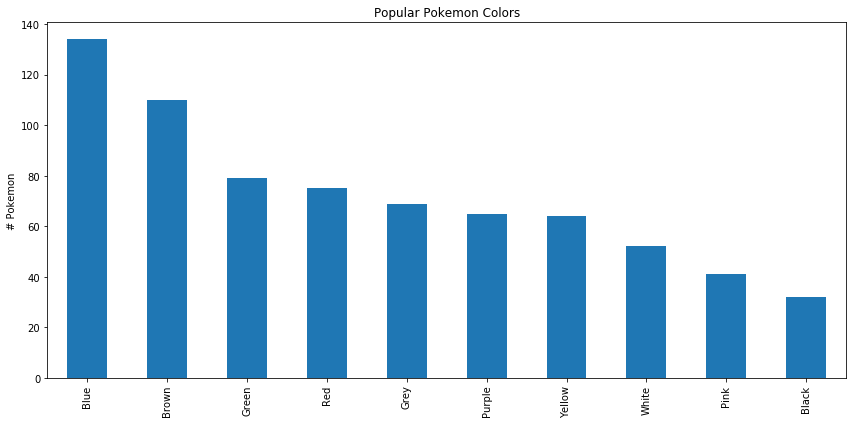

In [49]:
fig,ax=plt.subplots(figsize=(12,6))
df['Color'].value_counts().plot(kind='bar')
ax.set_title("Popular Pokemon Colors");
ax.set_ylabel("# Pokemon");
fig.tight_layout() #this keeps the x-labels from getting cut off

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise 6.6:**
<p>Make a bar plot of the top pokemon morphologies.
</div>

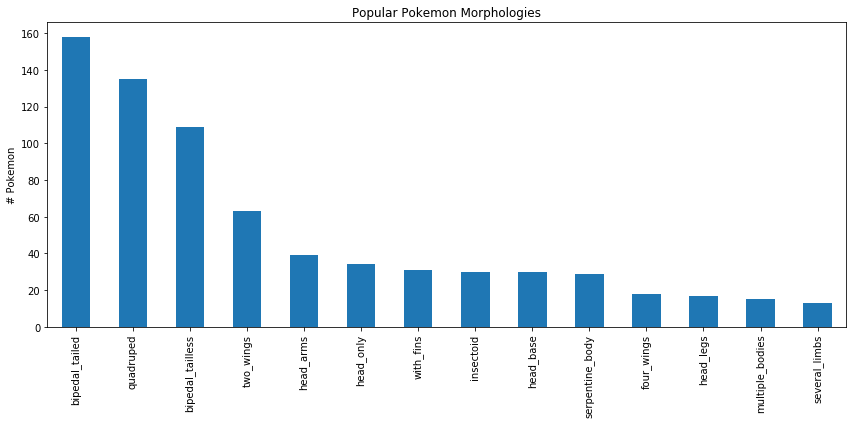

In [50]:
fig,ax=plt.subplots(figsize=(12,6))
df['Body_Style'].value_counts().plot(kind='bar')
ax.set_title("Popular Pokemon Morphologies");
ax.set_ylabel("# Pokemon");
fig.tight_layout() #this keeps the x-labels from getting cut off

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Groupby operations</h2>
<p>We're going to group by two characteristics: the body style and the gender, the find the minimum injection volume in each group
</div>

In [51]:
grouped = df.groupby(['Body_Style','hasGender',]).mean()

columns_to_display = ['Total','Attack','Defense']

grouped[columns_to_display].head(20)

Total      Attack     Defense
Body_Style       hasGender                                    
bipedal_tailed   False      634.444444  118.333333  105.000000
                 True       424.167785   80.496644   67.684564
bipedal_tailless False      571.142857  101.428571  100.142857
                 True       405.894737   74.494737   64.631579
four_wings       True       439.611111   76.777778   63.111111
head_arms        False      466.111111   71.000000   95.666667
                 True       421.566667   69.300000   67.866667
head_base        False      349.000000   66.250000   66.250000
                 True       397.500000   62.692308   78.730769
head_legs        False      455.000000   70.000000   80.000000
                 True       328.733333   60.866667   64.066667
head_only        False      421.727273   57.636364   69.909091
                 True       348.260870   57.043478   76.130435
insectoid        True       353.033333   70.966667   76.466667
multiple_bodies  False      465.000000   86.000000  101.000000
                 True       405.300000   69.200000   89.900000
quadruped        False      611.666667  103.083333  100.916667
                 True       400.601626   74.934959   66.349593
serpentine_body  False      653.333333  123.333333  103.666667
                 True       396.692308   66.884615   76.461538

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise 6.7:**
<p>Use groupby to compute mean attack points for each color of pokemon.
</div>

In [52]:
df.groupby('Color')['Attack'].mean()

Color
Black     77.000000
Blue      75.746269
Brown     78.554545
Green     74.455696
Grey      81.971014
Pink      54.609756
Purple    71.738462
Red       82.800000
White     69.442308
Yellow    71.390625
Name: Attack, dtype: float64

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Making a DataFrame from scratch</h2>
<p>
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
**From an array**
</div>

In [68]:
data = np.random.rand(100,3)
columns = ['feature_1','feature_2','feature_3']
df_arr = pd.DataFrame(data,columns=columns)
df_arr.head()

,feature_1,feature_2,feature_3
0,0.860018,0.339414,0.106071
1,0.131519,0.872844,0.127853
2,0.404507,0.575828,0.231037
3,0.560355,0.232480,0.891770
4,0.034612,0.869904,0.672169


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
**From a dictionary of lists**
</div>

In [54]:
name = ['Larry','Moe','Curly']
score = [1.,3.2,39.]

dict_of_lists = {
    'name': name,
    'score': score,
}

df_from_dict = pd.DataFrame(dict_of_lists)
df_from_dict

,name,score
0,Larry,1.0
1,Moe,3.2
2,Curly,39.0


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
**From a list of dictionaries**
</div>

In [55]:
list_of_dicts = [
    {'name': 'Larry', 'score': 1.0},
    {'name': 'Moe', 'score': 3.2},
    {'name': 'Curly'},
]

df_from_list = pd.DataFrame(list_of_dicts)
df_from_list

,name,score
0,Larry,1.0
1,Moe,3.2
2,Curly,NaN


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Saving (to_csv(), to_excel())</h2>
<p>
</div>

In [56]:
save_methods = [x for x in dir(df) if 'to_' in x]
print("save_methods:")
for method in save_methods:
    print(method)

save_methods:
to_clipboard
to_csv
to_dense
to_dict
to_excel
to_feather
to_gbq
to_hdf
to_html
to_json
to_latex
to_msgpack
to_panel
to_period
to_pickle
to_records
to_sparse
to_sql
to_stata
to_string
to_timestamp
to_xarray


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>Save to Excel
</div>

In [57]:
df_arr.to_excel('random_df.xls')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>Save to a csv
</div>

In [58]:
df_arr.to_csv('random_df.csv')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise 6.8:** 
<p>Some pokemon show a skew in their gender distribution, designated in the column ```Pr_Male```. Is there a relationship between the color and gender tendencies?
</div>

In [59]:
df.groupby('Color')['Pr_Male'].mean()

Color
Black     0.541667
Blue      0.597107
Brown     0.539663
Green     0.610714
Grey      0.553879
Pink      0.375000
Purple    0.523305
Red       0.603846
White     0.502660
Yellow    0.551339
Name: Pr_Male, dtype: float64

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise 6.9:** 
<p>The ```Catch_Rate``` column indicates the prevalence of different kinds of pokemon in the population, with pokemon with larger values getting caught more frequently. Use the pandas documentation or Stack Overflow to figure how to sort a dataframe by values in this column to see the most common pokemon.
</div>

In [60]:
df.sort_values('Catch_Rate',ascending=False).head()

,Number,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
Name,,,,,,,,,,,,,,,,,,,,,
Purrloin,509,Dark,NaN,281,41,50,37,50,37,66,...,Purple,True,0.50,Field,NaN,False,0.41,10.1,255,quadruped
Minccino,572,Normal,NaN,300,55,50,40,40,40,75,...,Grey,True,0.25,Field,NaN,False,0.41,5.8,255,quadruped
Bellsprout,69,Grass,Poison,300,50,75,35,70,30,40,...,Green,True,0.50,Grass,NaN,False,0.71,4.0,255,bipedal_tailless
Numel,322,Fire,Ground,305,60,60,40,65,45,35,...,Yellow,True,0.50,Field,NaN,False,0.71,24.0,255,quadruped
Spoink,325,Psychic,NaN,330,60,25,35,70,80,60,...,Black,True,0.50,Field,NaN,False,0.71,30.6,255,head_arms


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise 6.10:** 
<p>Explore the relationship between rarity and .

<p> Choose one skill ('Attack','Defense' or 'Speed') and do the following.
<ol>
<li>Use the scipy package to assess whether Catch_Rate predicts the skill.
<li>Create a scatterplot to visualize how the skill depends upon the rarity of the pokemon.
<li>Overlay a best fit line onto the scatterplot.
</ol>
</div>

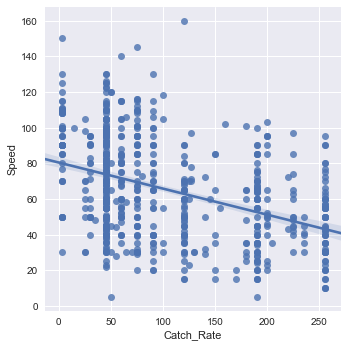

In [61]:
import seaborn as sns
sns.lmplot('Catch_Rate','Speed',data=df)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise 6.11**:
<p>Explore the pokemon data some more and find something interesting!!</p>

</div>